<a href="https://colab.research.google.com/github/garvit26/image_classification/blob/main/imgclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --user tensorflow
!pip install --user keras
!pip install opencv-python

In [ ]:
import tensorflow as tf
import os

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/My Drive/dataset/train'

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(path)

Found 120 files belonging to 5 classes.


In [ ]:
image_size = (256, 256)
batch_size = 5
epochs = 10
num_classes = 5

basic CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.initializers import he_normal

In [ ]:
model = Sequential()
def lr_schedule(epoch):
    return 0.001 * 0.9 ** epoch

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.add(BatchNormalization())

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        )

Found 120 images belonging to 5 classes.


In [ ]:
try:
    model.fit(train_generator, epochs=epochs,callbacks=[lr_scheduler])
except Exception as e:
    print(e)

Epoch 1/10
24/24 [==============================] - 38s 2s/step - loss: 3.2049 - accuracy: 0.7650 - lr: 0.0010
Epoch 2/10
24/24 [==============================] - 38s 2s/step - loss: 3.0850 - accuracy: 0.8000 - lr: 9.0000e-04
Epoch 3/10
24/24 [==============================] - 36s 2s/step - loss: 3.0850 - accuracy: 0.8000 - lr: 8.1000e-04
Epoch 4/10
24/24 [==============================] - 38s 2s/step - loss: 3.0850 - accuracy: 0.8000 - lr: 7.2900e-04
Epoch 5/10
24/24 [==============================] - 37s 2s/step - loss: 3.0850 - accuracy: 0.8000 - lr: 6.5610e-04
Epoch 6/10
24/24 [==============================] - 38s 2s/step - loss: 3.0850 - accuracy: 0.8000 - lr: 5.9049e-04
Epoch 7/10
24/24 [==============================] - 39s 2s/step - loss: 3.0850 - accuracy: 0.8000 - lr: 5.3144e-04
Epoch 8/10
24/24 [==============================] - 37s 2s/step - loss: 3.0850 - accuracy: 0.8000 - lr: 4.7830e-04
Epoch 9/10
24/24 [==============================] - 37s 2s/step - loss: 3.0850 - acc

In [ ]:
val_path='/content/drive/My Drive/dataset/val'
test_path='/content/drive/My Drive/dataset/test'

In [ ]:
# Data loading for validation
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        val_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

# Data loading for testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 10 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [ ]:
model.fit(train_generator, epochs=23, validation_data=validation_generator)

Epoch 1/23
24/24 [==============================] - 4s 184ms/step - loss: 0.4674 - accuracy: 0.7750 - val_loss: 0.4712 - val_accuracy: 0.9000
Epoch 2/23
24/24 [==============================] - 6s 249ms/step - loss: 0.5124 - accuracy: 0.7750 - val_loss: 0.4720 - val_accuracy: 0.8000
Epoch 3/23
24/24 [==============================] - 4s 171ms/step - loss: 0.4638 - accuracy: 0.8083 - val_loss: 0.4587 - val_accuracy: 0.8000
Epoch 4/23
24/24 [==============================] - 4s 157ms/step - loss: 0.5001 - accuracy: 0.7833 - val_loss: 0.4521 - val_accuracy: 0.8000
Epoch 5/23
24/24 [==============================] - 4s 155ms/step - loss: 0.4879 - accuracy: 0.8167 - val_loss: 0.4801 - val_accuracy: 0.8000
Epoch 6/23
24/24 [==============================] - 5s 199ms/step - loss: 0.4405 - accuracy: 0.8250 - val_loss: 0.4872 - val_accuracy: 0.7000
Epoch 7/23
24/24 [==============================] - 4s 150ms/step - loss: 0.4407 - accuracy: 0.8333 - val_loss: 0.4790 - val_accuracy: 0.7000
Epoch 

mobilenet

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [ ]:
img_size = (224, 224)
train_data = tf.keras.utils.image_dataset_from_directory(
    path,
    batch_size=batch_size,
    image_size=img_size,
    validation_split=0.2,
    subset="training",
    seed=42
)


Found 120 files belonging to 5 classes.
Using 96 files for training.


In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')
# Create the MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the pre-trained layers
base_model.trainable = False


# Create a new model on top
model = Sequential([
     base_model,
    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 120 images belonging to 5 classes.


In [ ]:
model.fit(train_generator, epochs=100)

Epoch 1/100
24/24 [==============================] - 9s 353ms/step - loss: 0.2880 - accuracy: 0.8667
Epoch 2/100
24/24 [==============================] - 7s 272ms/step - loss: 0.2042 - accuracy: 0.9167
Epoch 3/100
24/24 [==============================] - 9s 390ms/step - loss: 0.1877 - accuracy: 0.9333
Epoch 4/100
24/24 [==============================] - 7s 275ms/step - loss: 0.1578 - accuracy: 0.9500
Epoch 5/100
24/24 [==============================] - 9s 346ms/step - loss: 0.2233 - accuracy: 0.8667
Epoch 6/100
24/24 [==============================] - 8s 341ms/step - loss: 0.2583 - accuracy: 0.8917
Epoch 7/100
24/24 [==============================] - 7s 266ms/step - loss: 0.1528 - accuracy: 0.9333
Epoch 8/100
24/24 [==============================] - 10s 394ms/step - loss: 0.2845 - accuracy: 0.8667
Epoch 9/100
24/24 [==============================] - 7s 267ms/step - loss: 0.2149 - accuracy: 0.9250
Epoch 10/100
24/24 [==============================] - 9s 365ms/step - loss: 0.2664 - accur

In [ ]:
# Data loading for validation
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        val_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

# Data loading for testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 10 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [ ]:
model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
24/24 [==============================] - 16s 682ms/step - loss: 0.1862 - accuracy: 0.9167 - val_loss: 0.2992 - val_accuracy: 0.8000
Epoch 2/100
24/24 [==============================] - 7s 304ms/step - loss: 0.1382 - accuracy: 0.9167 - val_loss: 0.1627 - val_accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 8s 323ms/step - loss: 0.1491 - accuracy: 0.9333 - val_loss: 0.1883 - val_accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 10s 420ms/step - loss: 0.1579 - accuracy: 0.9333 - val_loss: 0.3710 - val_accuracy: 0.8000
Epoch 5/100
24/24 [==============================] - 7s 298ms/step - loss: 0.1460 - accuracy: 0.9333 - val_loss: 0.1314 - val_accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 10s 414ms/step - loss: 0.0953 - accuracy: 0.9583 - val_loss: 0.3607 - val_accuracy: 0.8000
Epoch 7/100
24/24 [==============================] - 7s 307ms/step - loss: 0.1386 - accuracy: 0.9333 - val_loss: 0.2389 - val_accuracy: 0.9

In [ ]:
model.evaluate(test_generator)

2/2 [==============================] - 4s 3s/step - loss: 0.1310 - accuracy: 0.9000


[0.13101384043693542, 0.8999999761581421]

color hist + KNN

In [ ]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [ ]:
# Extract color histogram features from the images
def extract_histogram(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist_hue = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    hist_saturation = cv2.calcHist([hsv], [1], None, [256], [0, 256])
    hist_value = cv2.calcHist([hsv], [2], None, [256], [0, 256])
    hist_features = np.concatenate([hist_hue, hist_saturation, hist_value]).flatten()
    return hist_features


In [ ]:

# Access the images and labels from the generator
training_images = []
training_labels = []

for images, labels in train_generator:
    for image, label in zip(images, labels):
        training_images.append(image)
        training_labels.append(np.argmax(label))  # Assuming one-hot encoded labels

    if len(training_images) >= len(train_generator.filenames):
        break
# Convert lists to numpy arrays
training_images = np.array(training_images)
training_labels = np.array(training_labels)


In [ ]:
X_train_hist = [extract_histogram(image) for image in training_images]


Optimal number of neighbors: 19


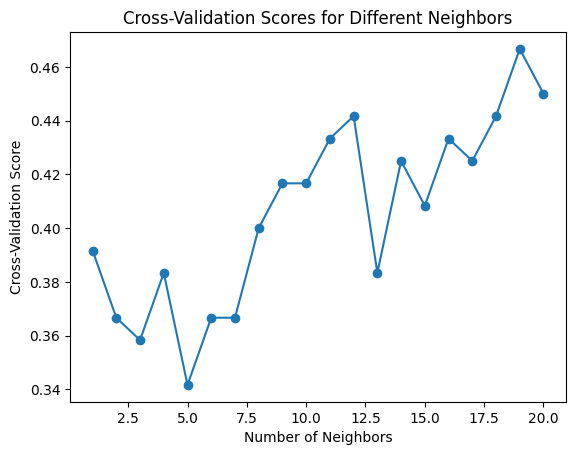

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_hist)
# Define a range of neighbors to try
neighbors_range = list(range(1, 21))  # You can adjust the range as needed

# Perform cross-validation for different values of n_neighbors
cv_scores = []

for n_neighbors in neighbors_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(knn_classifier, X_train_scaled, training_labels, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the optimal number of neighbors based on cross-validation scores
optimal_neighbors = neighbors_range[np.argmax(cv_scores)]
print(f"Optimal number of neighbors: {optimal_neighbors}")

# Plot the cross-validation scores
import matplotlib.pyplot as plt

plt.plot(neighbors_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Different Neighbors')
plt.show()

In [ ]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_classifier.fit(X_train_hist, training_labels)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
training_predictions = knn_classifier.predict(X_train_hist)

In [ ]:
training_accuracy = accuracy_score(training_labels, training_predictions)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

Training Accuracy: 68.33%
